## 5.3 Preparing customer groups for forecasting

Data preprocessing is one of the bedrocks for forecasting model’s accuracy. It is crucial for transforming raw data into another format that algorithms can analyze with precision. The numerical features are scaled to neutralize scale disparities and encode categorical variables numerically to ensure the model interprets every data point correctly. These steps are setting the stage for the analysis that follows. After explaining this process, the following chapter will delve into the effect the forecasting horizon has on the model’s prediction accuracy. By doing so, analyze how the model could be used to predict energy consumption across different time spans.

### 5.3.1 Min-max scaling X and creating dummy variables


The scaling of features and the transformation of categorical variables into a format is done to help the interpreted by algorithms. This section dives into the role of Min-Max scaling in normalizing data, alongside the creation of dummy variables for categorical data, explaining how these processes improve model performance.
Scaling features is essential in forecasting models that are sensitive to the magnitude of variables. Disparate scales across features can lead to skewed weight which affects the model’s assignments, whereas models disproportionately favor features with larger magnitudes. This affects the model's ability to generalize from the data for the worse.  Equally crucial is the treatment of categorical data through the creation of dummy variables. Many machine learning algorithms are designed to operate on numerical input and thus cannot directly handle categorical data. Dummy variables serve as a bridge, transforming qualitative data into a binary numerical format. As such enabling the inclusion of categorical predictors in the model. This allows for a broader analysis that incorporates both numerical and categorical influences on the forecasted outcome. As the dataset of this assignment has categorical variables this is an essential part of the model process.
Moreover, the use of dummy variables preserves the nominal nature of the data without imposing an artificial relationship, which could mislead the model. This method ensures that the categorical data is accurately represented, allowing the model to discern the distinct influence of each category on the predictive outcome.
The conversion of categorical variables into dummy or indicator variables process involves the following steps:

1. **Identification of Categorical Variables:** Recognize all categorical variables        within the dataset that cannot be directly interpreted by numerical models.
2. **One-Hot Encoding**: Implement one-hot encoding, a technique where each      category value is converted into a new binary column. For each record, the presence of a category is marked by 1, and 0 signifies its absence.
3. **Avoiding Dummy Variable Trap**: Ensure that for each categorical feature with  N categories, N-1 dummy variables are created to prevent multicollinearity. 
    
Now that the process of making dummy variables has been explained another problem arises in the dataset. The problem is that there are variables that have different scales, therefore Min-Max scaling is used. Min-Max is a normalization technique that adjusts the features of the data to a common scale, ranging from 0 to 1. This method transforms each feature by subtracting the minimum value of the feature and then divide by the range of the feature values. The formula for Min-Max scaling is given by:

$$ x' = \frac{x - \min(x)}{\max(x) - \min(x)}  $$

In this equation, \\( x' \\) denotes the scaled value, \\( x \\) represents the original value, \\( \min(x) \\) is the minimum value across the feature, and \\( \max(x) \\) is the maximum value. This transformation ensures that no single feature disproportionately influences the model due to its scale. This makes the model less sensitive to the scale of features and thus more capable of identifying the true underlying patterns in the data. By aligning the scales of the features, Min-Max scaling helps in stabilizing the convergence of algorithms and facilitating a more balanced weight assignment across features.

### 5.3.2 Detrending and deseasonalizing target variable

In earlier chapters (3.1), the theoretical foundations of time series analysis were investigated, focusing on the decomposition of time series data into its fundamental components: trend (\\( T \\)), seasonality (\\( S^k \\)), and remainders (\\( R \\)). This section builds upon that foundation, specifically addressing the practical implications and the method used for detrending and deseasonalizing the target variable within the forecasting model framework. The reason behind these preprocessing steps is to make the predictability of the model better by isolating and removing systematic patterns that can obscure the underlying signal in the time series data.

The presence of trends and seasonal patterns in time series data introduces systematic variations that can significantly influence the performance of forecasting models. As mentioned in chapter 3.1 trends represent long-term movements in data, either upwards or downwards, while seasonality indicates regular, predictable patterns that occurs at specific intervals within the data. By removing these components, the model's ability to capture the true underlying behaviors of the time series improves its predictability and accuracy. 

Detrending and deseasonalizing are accomplished through various mathematical and algorithmic approaches, with the MSTL decomposition standing out as a foundational method. MSTL decomposition separates the time series into trend, seasonal, and remaining components through procedure. For a more detailed look at the theoretical explanation of MSTL.

To ensure the correct application of the detrending and deseasonalizing processes, the component separation is verified after applying MSTL decomposition, and the extracted trend and seasonal components is assessed. The process of detrending and deseasonalizing directly contributes to making the target variable more stationary. By removing trends and seasonal fluctuations, these processes reduce systematic changes over time, thereby stabilizing the mean and reducing variations within the series. This transformation allows predictive models to perform more effectively, as they can focus on modeling the remainders, which ideally is not random noise, improving the model’s ability to forecast future values with greater accuracy. It may even make sure that the horizon of prediction in time does not have that large of an effect on the accuracy and thereby hopefully make the impact on the prediction accuracy low such the model can be used at different forecasting horizons. 

Later on, the application of OLS and RF is used on the remainders to investigate if these methods can accurately predict the remainders. In the completed evaluation, the selection of the model that performs the best will be chosen and then combined with models from MSTL decomposition. The aim is to achieve the optimal outcome and thereby find the most accurate prediction model.


### 5.3.3. Lagging X to forecast into future

In prediction, the selection of the right forecasting horizon (\\( h \\)) is a trade-off between the specific purpose of the forecast and the effect the accuracy the horizon has on the forecasts. This initial choice of different horizons can substantially affect forecast accuracy and model performance. Understanding the relationship between the forecasting horizon and its impact on predictiveness can help choose the best model calibration. This section aims to analyze the significance of forecasting horizons within the context of using OLS for predictive analysis and how strategic lagging of variables (\\( X \\)) can improve forecasting into the future.

For this study, the selected forecasting horizons (\\( h \\)) are 1, 24, 168, 720, 2160, and 4320 hours. These intervals are chosen to encompass a broad spectrum of forecasting needs, ranging from short-term (1 hour) to long-term forecasts (4320 hours), allowing for a broad analysis across different time frames. The rationale behind selecting these specific intervals lies in their relevance to operational and strategic decision-making processes within Andel Energi. It should be noted that the assumption is that the effect of the forecasting horizon has the same effect on the RF model. The reason behind this assumption is based on how much the heavy computational cost is and the time it would take as a result.

The study employs several accuracy metrics to evaluate the forecasting performance, including Mean Absolute Error (*MAE*), Root Mean Squared Error (*RMSE*), and the coefficient of determination (\\( R^2 \\)). Each metric offers a unique perspective which helps to assess the accuracy and reliability of the forecasting model, to summarize: 

* *MAE* measures the average magnitude of the errors in a set of predictions, without considering their direction. It's a straightforward metric that provides insight into the average error magnitude.

$$ MAE = \frac{1}{N}\sum_{t=n_{train+1}}^{T} |R_t - \hat{R_t}| $$  

* *RMSE* provides a measure of the square root of the average squared differences between predicted and actual values, emphasizing larger errors more significantly than MAE, thereby penalizing substantial deviations more heavily.

$$ RMSE = \sqrt{\frac{1}{N}\sum_{t=n_{train+1}}^{T} (R_t - \hat{R_t})^2} $$

Together, these metrics give a framework for evaluating the performance of the forecasting model across different horizons, facilitating an informed selection of the most appropriate model configurations for accurate future predictions. For a more detailed description please see chapter 3.6.1

### 5.3.4 The impact of forecasting horizon (\\( h \\))

This section will look into how varying the length of the forecasting horizon affects the performance of OLS models. The forecasting horizon, represented as \\( h \\), refers to the future time period over which predictions are made, ranging from very short (1 hour) to long-term forecasts (4320 hours). By examining OLS models across these diverse horizons, the aim is to find a trend in prediction accuracy.

To better understand which impact the forecasting horizon (\\( h \\)) has on model performance, there was trained and tested for various OLS models across a spectrum of horizons, specifically at 1, 24, 48, 168, 720, 2160, and 4320 hours.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_path = "C:/Users/madsh/OneDrive/Dokumenter/kandidat/Fællesmappe/Forecasting-energy-consumption/Data/Results/OLS/Metrics/"

h1_24steps_results_path    = f"{base_path}h=1_steps_ahead=24_OLS_Metrics.csv"
h24_24steps_results_path   = f"{base_path}h=24_steps_ahead=24_OLS_Metrics.csv"
h48_24steps_results_path   = f"{base_path}h=48_steps_ahead=24_OLS_Metrics.csv"
h168_24steps_results_path  = f"{base_path}h=168_steps_ahead=24_OLS_Metrics.csv"
h720_24steps_results_path  = f"{base_path}h=720_steps_ahead=24_OLS_Metrics.csv"
h2160_24steps_results_path = f"{base_path}h=2160_steps_ahead=24_OLS_Metrics.csv"
h4320_24steps_results_path = f"{base_path}h=4320_steps_ahead=24_OLS_Metrics.csv"

h1_24steps_results    = pd.read_csv(h1_24steps_results_path)
h24_24steps_results   = pd.read_csv(h24_24steps_results_path)
h48_24steps_results   = pd.read_csv(h48_24steps_results_path)
h168_24steps_results  = pd.read_csv(h168_24steps_results_path)
h720_24steps_results  = pd.read_csv(h720_24steps_results_path)
h2160_24steps_results = pd.read_csv(h2160_24steps_results_path)
h4320_24steps_results = pd.read_csv(h4320_24steps_results_path)

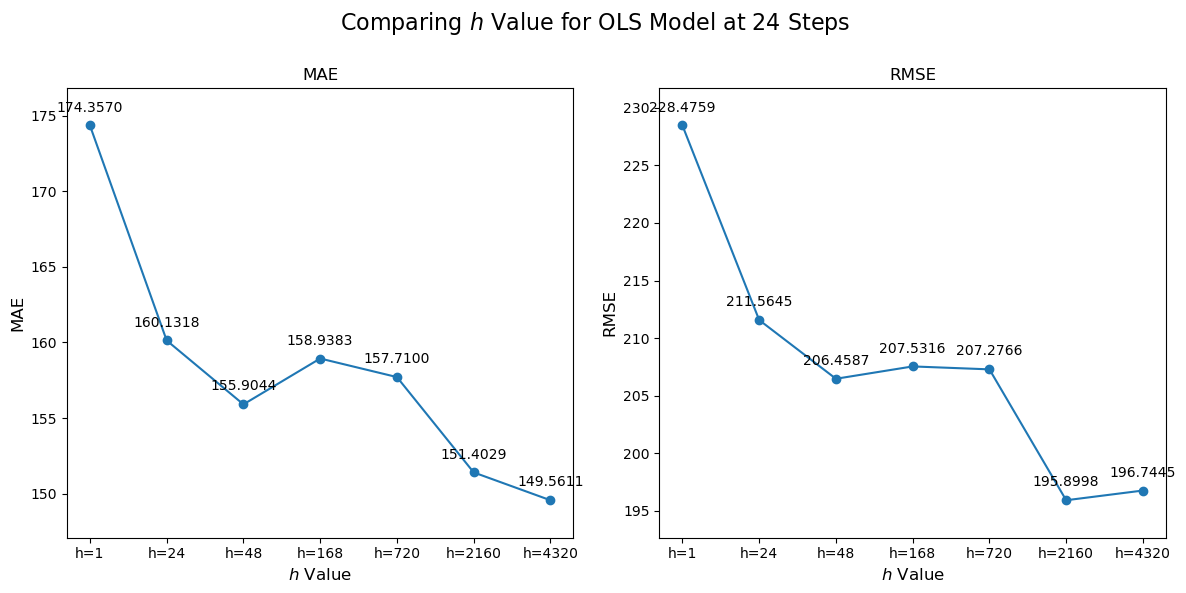

In [6]:
# Define a function to plot metrics
def plot_metric(ax, metric_name):
    # Directly map metric values from the data
    metric_values = {
        'h=1': h1_24steps_results[metric_name].values[0],
        'h=24': h24_24steps_results[metric_name].values[0],
        'h=48': h48_24steps_results[metric_name].values[0],
        'h=168': h168_24steps_results[metric_name].values[0],
        'h=720': h720_24steps_results[metric_name].values[0],
        'h=2160': h2160_24steps_results[metric_name].values[0],
        'h=4320': h4320_24steps_results[metric_name].values[0],
    }

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(list(metric_values.items()), columns=['h value', metric_name])

    # Scatter and line plot
    ax.scatter(df['h value'], df[metric_name], color='#1f77b4')
    ax.plot(df['h value'], df[metric_name], color='#1f77b4')

    # Annotating each point
    for i, txt in enumerate(df[metric_name]):
        ax.annotate(f"{txt:.4f}", (df['h value'][i], df[metric_name][i]), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

    # Setting labels and title
    ax.set_title(metric_name, fontsize=12)
    ax.set_xlabel('$h$ Value', fontsize=12)
    ax.set_ylabel(metric_name, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Adjusting y-axis limits
    min_val, max_val = df[metric_name].min(), df[metric_name].max()
    buffer = (max_val - min_val) * 0.1
    ax.set_ylim(min_val - buffer, max_val + buffer)

# Create a 1x2 subplot for MAE and RMSE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot_metric(ax1, 'MAE')
plot_metric(ax2, 'RMSE')

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.85)
fig.suptitle('Comparing $h$ Value for OLS Model at 24 Steps', fontsize=16)

plt.show()

This suggests that while the model's average absolute error marginally worsens in the short-term, it improves at mid-range horizons before destabilizing at the farthest horizon. The median RMSE demonstrates a similar pattern to MAE, with an initial rise, a subsequent decrease, and then a moderate increase at the longest horizon. This indicates that the model's performance in terms of the square root of average squared errors is somewhat consistent with MAE, although with a slightly more pronounced variability.

Interpreting the results from both the line graphs reveals the nuanced influence the forecasting horizon has on the accuracy of the OLS model. In the short-term horizon at ℎ=1 and ℎ=24, an increase in median MAE and RMSE is observed, which was not initially anticipated, suggesting that the model may encounter challenges in capturing shorter horizons in the data. Compared to the mid-range horizon between ℎ=168 and ℎ=2160, there is a general improvement in median 𝑀𝐴𝐸 and 𝑅𝑀𝑆𝐸. This could indicate the model's effectiveness at capturing and adjusting to patterns over medium-term intervals.

These findings show some practical forecasting applications, when it comes to short-term forecasting the need is for immediate forecasting, therefore a model may require additional fine-tuning or incorporation of more immediate past values to enhance accuracy. Whereas medium-term forecasting in the mid-range horizons shows promising results with more stable predictions, suggesting that the OLS model is better suited for medium-termed forecasting requirements. When looking at the long-term forecasting the variability observed at the longest horizon shows a rise in the accuracy matrices however, only a slight increase in the median. It indicates that the model could be used for larger horizons without having a large effect on the predictions.

The selection of a forecasting horizon should be aligned with the specific forecasting objectives. Short-term objectives may necessitate models optimized for sensitivity to recent changes, while medium- to long-term objectives might be better served by models that can balance and smooth out variability over time. The choice of horizon is therefore a question of what the forecasting is used for. If it is used as a real time trading tool it might not be the best framework due to the above-mentioned reasons but also because of the computation time of these models. However, if the objective is to predict energy consumption for monthly contracts or even longer the models has shown promising.